<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being able to extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use Logistic Regression or any other suitable classifier.

- Question: Why would we want this to be a classification problem?
- Answer: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10").

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters:

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [1]:
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

In [2]:
import pandas as pd
import numpy as np
import requests
import bs4
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

In [3]:
r = requests.get(URL)

In [4]:
soup = BeautifulSoup(r.text,'html.parser')

In [1]:
#print(soup.prettify())

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a `nobr` element inside of a `td` element with `class='snip'`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element='jobTitle'`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 

### Write 4 functions to extract each item: location, company, job, and salary.

Example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it.
    - Remember to use `try/except` if you anticipate errors.
- **Test** the functions on the results above and simple examples.

In [6]:
first_div = soup.find(name='div', attrs={'class':"jobsearch-SerpJobCard"})
print(first_div.text)



Junior Data Scientist




        Dow Jones


183 reviews


New York, NY 10176 (Murray Hill area)





            Source, query, and clean data required for larger scale data science projects. We are looking for a junior data scientist to join The Wall Street Journal’s...


30+ days ago   -  save job - more...if (!window['result_4769b53c33286f2e']) {window['result_4769b53c33286f2e'] = {};}window['result_4769b53c33286f2e']['showSource'] = false; window['result_4769b53c33286f2e']['source'] = "Dow Jones"; window['result_4769b53c33286f2e']['loggedIn'] = false; window['result_4769b53c33286f2e']['showMyJobsLinks'] = false;window['result_4769b53c33286f2e']['undoAction'] = "unsave";window['result_4769b53c33286f2e']['relativeJobAge'] = "30+ days ago";window['result_4769b53c33286f2e']['jobKey'] = "4769b53c33286f2e"; window['result_4769b53c33286f2e']['myIndeedAvailable'] = true; window['result_4769b53c33286f2e']['showMoreActionsLink'] = window['result_4769b53c33286f2e']['showMoreActionsLink'] 

Extracting location

In [7]:
def extract_location_from_result(result):
    try:
        return result.find(['span', 'div'], attrs={'class':'location'}).text
    except:
        return np.nan

In [8]:
extract_location_from_result(first_div)

'New York, NY 10176 (Murray Hill area)'

Extracting salary

In [9]:
def extract_salary_from_result(result):
    try:
        return result.find('span', attrs={'class':'no-wrap'}).text
    except:
        return np.nan

In [10]:
extract_salary_from_result(first_div)    

nan

Extracting company

In [11]:
def extract_company_from_result(jobs):
    try:
        return jobs.find('span', attrs={'class':'company'}).text.strip()
    except:
        return np.nan

In [12]:
extract_company_from_result(first_div)

'Dow Jones'

Extracting jobtitle

In [13]:
def extract_jobtitle_from_result(jobs):
    try:
        return jobs.find('a', attrs={'class':'turnstileLink'}).text
    except:
        return np.nan

In [14]:
print(extract_jobtitle_from_result(first_div))

Junior Data Scientist


Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

#### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search.
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different.

In [15]:
max_results_per_city = 3000

def scrape_by_cities(url_template, cities, starts):
    results = []
    given_cities = []
    for city in cities:
        for start in starts:
            url_formatted = url_template.format(city, start)
            request = requests.get(url_formatted)
            # turn into a BeautifulSoup object
            soup = BeautifulSoup(request.text, 'html.parser')
        
            # Grab the results from the request (as above)
            jobs = soup.find_all(name='div', attrs={'class':"jobsearch-SerpJobCard"})
        
            # Append to the full set of results
            for job in jobs:
                given_cities.append(city)
                results.append(job)
    return results, given_cities
              

In [16]:
url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}" 
cities = set(['Washington, DC', 'San Jose, CA', 'New+York', 'Philadelphia', 'Washington', 'Boston', 'Chicago', 
                 'San+Francisco', 'Austin', 'Seattle', 'Los+Angeles', 'Atlanta', 'Dallas', 
                 'Pittsburgh', 'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami'])
starts = range(0, max_results_per_city, 10)

results_usa = scrape_by_cities(url_template, cities, starts)

In [17]:
url_template = "https://www.indeed.co.uk/jobs?q=data+scientist+$20,000&l={}&start={}"
cities = set(['London, Greater London'])
starts = range(0, max_results_per_city, 10)

results_london = scrape_by_cities(url_template, cities, starts)

In [18]:
results = results_usa[0] + results_london[0]

In [19]:
results_city = results_usa[1] + results_london[1]

I added Washington, Boston and San Jose, CA to the list. Need to change the location request for London, becauase of the different webpage.

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [20]:
jobtitle = []
location = []
salary = []
company = []
for result in results:
    jobtitle.append(extract_jobtitle_from_result(result)) 
    location.append(extract_location_from_result(result))
    salary.append(extract_salary_from_result(result))
    company.append(extract_company_from_result(result))

df_dsijobs = pd.DataFrame({'Jobtitle': jobtitle, 'Location': location, 'Salary': salary, 'Company': company})
df_dsijobs

,Jobtitle,Location,Salary,Company
0,Data Analyst / Data Scientist,"Philadelphia, PA 19123 (Poplar-Ludlow-Yorktown...",\n $65 - $75 an hour,Defined Clarity
1,Graduate Environmental Scientist,"Philadelphia, PA","\n $47,783 a year",City of Philadelphia
2,Data Scientist,"Philadelphia, PA",NaN,EcoMetric
3,Data Scientist,"Plymouth Meeting, PA",NaN,IQVIA
4,Temporary Data Analyst (Institutional Research),"Philadelphia, PA 19104 (Belmont area)",NaN,University of the Sciences in Philadelphia
5,Scientist Certifying-Positive,"Norristown, PA",NaN,Quest Diagnostics
6,Data Scientist,"Radnor, PA",NaN,Lincoln Financial
7,Scientist Certifying-Negative,"Norristown, PA",NaN,Quest Diagnostics
8,Data Scientist,"Exton, PA",NaN,XL Catlin
9,Environmental Scientist Specialist,"Philadelphia, PA","\n $56,589 - $72,742 a year",City of Philadelphia


In [21]:
df_dsijobs['Cities'] = results_city

In [22]:
df_dsijobs.head()

,Jobtitle,Location,Salary,Company,Cities
0,Data Analyst / Data Scientist,"Philadelphia, PA 19123 (Poplar-Ludlow-Yorktown...",\n $65 - $75 an hour,Defined Clarity,Philadelphia
1,Graduate Environmental Scientist,"Philadelphia, PA","\n $47,783 a year",City of Philadelphia,Philadelphia
2,Data Scientist,"Philadelphia, PA",NaN,EcoMetric,Philadelphia
3,Data Scientist,"Plymouth Meeting, PA",NaN,IQVIA,Philadelphia
4,Temporary Data Analyst (Institutional Research),"Philadelphia, PA 19104 (Belmont area)",NaN,University of the Sciences in Philadelphia,Philadelphia


In [23]:
df_dsijobs.shape

(62262, 5)

In [24]:
df_dsijobs.isnull().sum()

Jobtitle        0
Location        0
Salary      54697
Company         1
Cities          0
dtype: int64

In [25]:
df_dsijobs[df_dsijobs['Location'].str.contains("San Jose")].head()

,Jobtitle,Location,Salary,Company,Cities
26970,Research Scientist I Investigator,"San Jose, CA",NaN,Kaiser Permanente,"San Jose, CA"
26971,Data Scientist (Intern) - United States,"San Jose, CA",NaN,Cisco,"San Jose, CA"
26972,Data Scientist,"San Jose, CA",NaN,Adobe,"San Jose, CA"
26973,Data Scientist (Full Time) - United States,"San Jose, CA",NaN,Cisco,"San Jose, CA"
26975,Data scientist,"San Jose, CA",NaN,Avila Trading,"San Jose, CA"


In [26]:
df_dsijobs[df_dsijobs['Location'].str.contains("London")].head()

,Jobtitle,Location,Salary,Company,Cities
56897,Data Scientist,London WC1B,"\n £35,000 - £45,000 a year",Invennt Ltd,"London, Greater London"
56898,Data Scientist,London,NaN,Oracle,"London, Greater London"
56899,Data Scientist,London,NaN,Funding Circle UK,"London, Greater London"
56900,Data Scientist - Natural Language Processing E...,London EC2Y,"\n £40,000 - £80,000 a year",Karssen,"London, Greater London"
56901,Lead Data Scientist - Growth,London,NaN,Trainline,"London, Greater London"


In [27]:
df_dsijobs.shape

(62262, 5)

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.
1. Some of the entries may be duplicated.
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries.

Only a small number of the scraped results have salary information - only these will be used for modeling.

In [28]:
df_dsijobs.Salary.isnull().sum()

54697

In [29]:
df_dsijobs.to_csv('scrape.csv')

In [30]:
df_clean_step1 = df_dsijobs.dropna()
df_clean_step1.head()

,Jobtitle,Location,Salary,Company,Cities
0,Data Analyst / Data Scientist,"Philadelphia, PA 19123 (Poplar-Ludlow-Yorktown...",\n $65 - $75 an hour,Defined Clarity,Philadelphia
1,Graduate Environmental Scientist,"Philadelphia, PA","\n $47,783 a year",City of Philadelphia,Philadelphia
9,Environmental Scientist Specialist,"Philadelphia, PA","\n $56,589 - $72,742 a year",City of Philadelphia,Philadelphia
18,Data Scientist/ Contract,"Philadelphia, PA",\n $50 an hour,Workbridge Associates,Philadelphia
20,"Data Scientist/ Python, R","Bala-Cynwyd, PA","\n $110,000 - $120,000 a year",Workbridge Associates,Philadelphia


In [31]:
df_clean_step1.shape

(7565, 5)

Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.

In [32]:
df_clean_step2 = df_clean_step1[df_clean_step1['Salary'].str.contains("year")]


In [33]:
df_clean_step2.shape

(6450, 5)

In [34]:
df_clean_step2.to_csv('results.csv')

Some of the entries may be duplicated.

In [35]:
df_clean_step2.duplicated().sum()

5545

In [36]:
df_clean_step3 = df_clean_step2.drop_duplicates(keep='first', inplace=False)

In [37]:
df_clean_step3.duplicated().sum()

0

In [38]:
df_clean_step3.shape

(905, 5)

In [39]:
df_clean_step3.head()

,Jobtitle,Location,Salary,Company,Cities
1,Graduate Environmental Scientist,"Philadelphia, PA","\n $47,783 a year",City of Philadelphia,Philadelphia
9,Environmental Scientist Specialist,"Philadelphia, PA","\n $56,589 - $72,742 a year",City of Philadelphia,Philadelphia
20,"Data Scientist/ Python, R","Bala-Cynwyd, PA","\n $110,000 - $120,000 a year",Workbridge Associates,Philadelphia
30,Data Scientist,"Philadelphia, PA","\n $90,000 - $130,000 a year",Jobspring Partners,Philadelphia
33,"Data Scientist/Analyst (R, Python,Google Cloud)","Philadelphia, PA","\n $90,000 - $100,000 a year",Workbridge Associates,Philadelphia


#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary.

In [40]:
import re

In [41]:
def to_num(string):
    return int(re.search(r'(\d+\,\d+)', string).group(1).replace(',', ''))

In [42]:
df_clean_step3['Salary'] = df_clean_step3['Salary'].apply(to_num)

/Users/klara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_clean_step3.head(3)

,Jobtitle,Location,Salary,Company,Cities
1,Graduate Environmental Scientist,"Philadelphia, PA",47783,City of Philadelphia,Philadelphia
9,Environmental Scientist Specialist,"Philadelphia, PA",56589,City of Philadelphia,Philadelphia
20,"Data Scientist/ Python, R","Bala-Cynwyd, PA",110000,Workbridge Associates,Philadelphia


Converting salaries in London(pound) to salaries in the USA(dollar)

In [44]:
def toUSD(row):
    if "London" in row['Cities']:
        return row['Salary'] * 1.28
    else:
        return row['Salary']


df_clean_step3['USDSalary'] = df_clean_step3.apply(toUSD, axis=1)
df_clean_step3[df_clean_step3['Cities'].str.contains('London')].head()
# df_clean_step3['Salary'].apply(np.mean, axis=0) 


/Users/klara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Jobtitle,Location,Salary,Company,Cities,USDSalary
56897,Data Scientist,London WC1B,35000,Invennt Ltd,"London, Greater London",44800.0
56900,Data Scientist - Natural Language Processing E...,London EC2Y,40000,Karssen,"London, Greater London",51200.0
56903,Data Scientist Graduate,Uxbridge,23000,Hertz Europe,"London, Greater London",29440.0
56904,"Data Scientist, 3-month fixed term contract",London,20000,Financial Conduct Authority,"London, Greater London",25600.0
56905,Lead Data Scientist,London,24000,Marshmallow,"London, Greater London",30720.0


### Save your results as a CSV

In [45]:
#df_clean_step3.to_csv('results.csv')

## QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your model's performance.

#### Load in the the data of scraped salaries

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_readin = pd.read_csv('./results.csv')
df_readin.head()

,Unnamed: 0,Jobtitle,Location,Salary,Company,Cities,USDSalary
0,1,Graduate Environmental Scientist,"Philadelphia, PA",47783,City of Philadelphia,Philadelphia,47783.0
1,9,Environmental Scientist Specialist,"Philadelphia, PA",56589,City of Philadelphia,Philadelphia,56589.0
2,20,"Data Scientist/ Python, R","Bala-Cynwyd, PA",110000,Workbridge Associates,Philadelphia,110000.0
3,30,Data Scientist,"Philadelphia, PA",90000,Jobspring Partners,Philadelphia,90000.0
4,33,"Data Scientist/Analyst (R, Python,Google Cloud)","Philadelphia, PA",90000,Workbridge Associates,Philadelphia,90000.0


In [3]:
df = df_readin.drop('Unnamed: 0', axis=1)
df.head()

,Jobtitle,Location,Salary,Company,Cities,USDSalary
0,Graduate Environmental Scientist,"Philadelphia, PA",47783,City of Philadelphia,Philadelphia,47783.0
1,Environmental Scientist Specialist,"Philadelphia, PA",56589,City of Philadelphia,Philadelphia,56589.0
2,"Data Scientist/ Python, R","Bala-Cynwyd, PA",110000,Workbridge Associates,Philadelphia,110000.0
3,Data Scientist,"Philadelphia, PA",90000,Jobspring Partners,Philadelphia,90000.0
4,"Data Scientist/Analyst (R, Python,Google Cloud)","Philadelphia, PA",90000,Workbridge Associates,Philadelphia,90000.0


#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

In [4]:
df.shape

(905, 6)

In [5]:
df.USDSalary.median()

80000.0

In [6]:
low_salary = df[df['USDSalary'] < df.USDSalary.median()]
high_salary = df[df['USDSalary'] > df.USDSalary.median()]

In [7]:
low_salary.describe()

,Salary,USDSalary
count,450.000000,450.000000
mean,50962.248889,56765.169867
std,15079.731919,14552.867443
min,10000.000000,12800.000000
25%,40000.000000,45223.680000
50%,50000.000000,57600.000000
75%,60000.000000,70286.000000
max,79000.000000,79000.000000


In [8]:
high_salary.describe()

,Salary,USDSalary
count,441.000000,441.000000
mean,105598.895692,110033.577596
std,28088.154352,25228.026477
min,65000.000000,80500.000000
25%,88000.000000,92000.000000
50%,100000.000000,102400.000000
75%,118000.000000,120000.000000
max,200000.000000,200000.000000


In [9]:
y = df.USDSalary.map(lambda x: 1 if x < df.USDSalary.median() else 0)

#### Thought experiment: What is the baseline accuracy for this model?

baseline_accuracy = majority_class_N / total_N

In [10]:
y.value_counts(normalize=True)

0    0.502762
1    0.497238
Name: USDSalary, dtype: float64

In [11]:
print('baseline:', y.value_counts(normalize=True).max())

baseline: 0.5027624309392266


### Create a classification model to predict High/Low salary. 


#### Model based on location:

- Start by ONLY using the location as a feature. 
- Use logistic regression with both statsmodels and sklearn.
- Use a further classifier you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.

#### Model taking into account job levels and categories:

- Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title or whether 'Manager' is in the title. 
- Incorporate other text features from the title or summary that you believe will predict the salary.
- Then build new classification models including also those features. Do they add any value? 
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models. 
- Discuss model coefficients or feature importances as applicable.

#### Model evaluation:

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. 


- Use cross-validation to evaluate your models. 
- Evaluate the accuracy, AUC, precision and recall of the models. 
- Plot the ROC and precision-recall curves for at least one of your models.

Model based on location

In [12]:
#Use logistic regression with both statsmodels and sklearn.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import statsmodels.formula.api as smf

In [14]:
#Transforming the classifier to dummy variable.
cities_dum = pd.get_dummies(df.Cities)
cities_dum.head(2)

,Atlanta,Austin,Boston,Chicago,Dallas,Denver,Houston,"London, Greater London",Los+Angeles,Miami,New+York,Philadelphia,Phoenix,Pittsburgh,Portland,"San Jose, CA",San+Francisco,Seattle,Washington,"Washington, DC"
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [15]:
X = cities_dum

In [16]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: USDSalary, dtype: int64

In [17]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [18]:
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=10)
print(scores)
print(np.mean(scores))

[0.50549451 0.04395604 0.12087912 0.45054945 0.15384615 0.47777778
 0.64444444 0.63333333 0.5        0.5       ]
0.403028083028083


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#Xt_train = scaler.fit_transform(X_train)
#Xt_test = scaler.transform(X_test)

In [21]:
#logreg = LogisticRegression()
#logreg.fit(X, y)

In [22]:
print(logreg.fit(X_train, y_train))
print(logreg.predict(X_test))
#print(logreg.predict_proba(X_test))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0
 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1]


In [23]:
# model score 
logreg.score(X,y)

0.7005524861878453

In [24]:
logreg.score(X_train,y_train)

0.6947513812154696

In [25]:
# model score after cross_validation
logreg.score(X_test,y_test)

0.7237569060773481

In [26]:
model = LogisticRegressionCV()

In [27]:
# setup the grid search
params = {'penalty':['l1','l2'],
          'Cs': [np.logspace(-4,4,10)],
          'fit_intercept':[True,False],
          'solver':['liblinear']}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train,y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C_)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train,y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test,y_test))
#print('Best estimator coefficients:')
#print(gs.best_estimator_.coef_)

Best Parameters:
{'Cs': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]), 'fit_intercept': False, 'penalty': 'l1', 'solver': 'liblinear'}
Best estimator C:
[0.35938137]
Best estimator mean cross validated training score:
0.6795580110497238
Best estimator score on the full training set:
0.6850828729281768
Best estimator score on the test set:
0.7071823204419889


In [28]:
#Use a further classifier you find suitable.

In [29]:
#Transforming the classifier to dummy variable.
title_city_dum = pd.get_dummies(df[['Jobtitle', 'Cities']])
title_city_dum.head(2)

,Jobtitle_018 Data / ETL Engineer II,Jobtitle_3 x Research Fellow (Machine Learning),Jobtitle_919-AP-10564446-EXT - Epidemiologist,Jobtitle_919-AP-1333932-EXT - Senior HIV/STI Surveillance and Prevent...,Jobtitle_ABS/CLO Research Analyst,Jobtitle_AI Data Scientist,Jobtitle_AI Labs - 30 x Data Scientist / Machine Learning Engineer (a...,Jobtitle_AWS DevOps Engineer,Jobtitle_Account Manager,Jobtitle_Accountant,...,Cities_New+York,Cities_Philadelphia,Cities_Phoenix,Cities_Pittsburgh,Cities_Portland,"Cities_San Jose, CA",Cities_San+Francisco,Cities_Seattle,Cities_Washington,"Cities_Washington, DC"
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [30]:
Xm = title_city_dum

In [31]:
logreg = LogisticRegression()
scores = cross_val_score(logreg, Xm, y, cv=10)
print(scores)
print(np.mean(scores))

[0.50549451 0.07692308 0.16483516 0.45054945 0.15384615 0.62222222
 0.63333333 0.62222222 0.5        0.5       ]
0.4229426129426129


In [32]:
Xm_train, Xm_test, y_train, y_test = train_test_split(Xm, y, test_size=0.2, random_state=1)
logreg.fit(Xm_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
print(logreg.fit(Xm_train, y_train))
print(logreg.predict(Xm_test))
#print(logreg.predict_proba(Xm_test))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0
 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1]


In [34]:
# model score 
logreg.score(Xm,y)

0.7966850828729282

In [35]:
logreg.score(Xm_train,y_train)

0.8121546961325967

In [36]:
# model score after cross_validation
logreg.score(Xm_test,y_test)

0.7348066298342542

The score of the model becomes worse with cross-validation, but it is still better with the additional 'Jobtitle' feature

In [37]:
model = LogisticRegressionCV()

In [38]:
# setup the grid search
params = {'penalty':['l1','l2'],
          'Cs': [np.logspace(-4,4,10)],
          'fit_intercept':[True,False],
          'solver':['liblinear']}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(Xm_train,y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C_)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(Xm_train,y_train))
print('Best estimator score on the test set:')
print(gs.score(Xm_test,y_test))
#print('Best estimator coefficients:')
#print(gs.best_estimator_.coef_)

Best Parameters:
{'Cs': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]), 'fit_intercept': False, 'penalty': 'l2', 'solver': 'liblinear'}
Best estimator C:
[2.7825594]
Best estimator mean cross validated training score:
0.680939226519337
Best estimator score on the full training set:
0.9585635359116023
Best estimator score on the test set:
0.7237569060773481


In [39]:
#Display the coefficients/feature importances and write a short summary of what they mean.

In [40]:
from sklearn.linear_model import LogisticRegressionCV
lr_ridge = LogisticRegressionCV(
    penalty='l2', Cs=100, cv=10, scoring='accuracy')
lr_ridge.fit(X_train, y_train)

print(lr_ridge.C_)
print(lr_ridge.score(X_train, y_train))
print(lr_ridge.score(X_test, y_test))

[0.00599484]
0.6850828729281768
0.7071823204419889


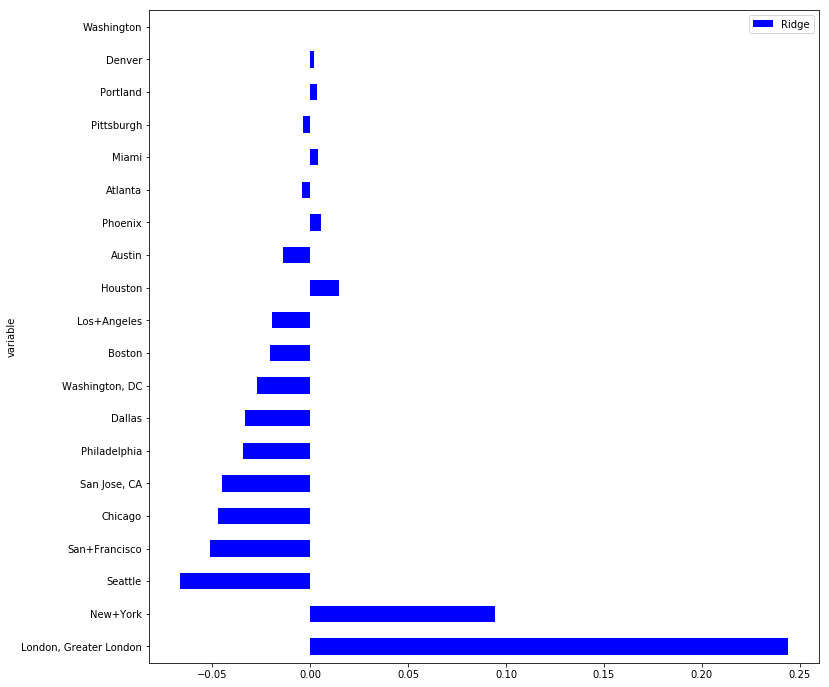

In [41]:
coefs_vars_ridge = pd.DataFrame({
    'coef': lr_ridge.coef_[0],
    'variable': X.columns,
    'abscoef': np.abs(lr_ridge.coef_[0])
})
coefs_vars_ridge.sort_values('abscoef', ascending=False, inplace=True)
coefs_vars_ridge.plot(kind='barh',x='variable',y='coef',color='b',figsize=(12,12),label='Ridge')
plt.show()

In [42]:
#London plays the most important role among the features, which is really interesting.

Model taking into account job levels and categories

In [43]:
#Create a few new variables in your dataframe to represent interesting features of a job title.
#For example, create a feature that represents whether 'Senior' is in the title or whether 'Manager' is in the title.

In [44]:
df['Jobtitle'].value_counts().head(12)

Data Scientist                   67
Data Engineer                    18
Senior Data Scientist            15
Lead Data Scientist              10
Senior Software Engineer          7
Principal Data Scientist          5
Data Science Manager              4
Machine Learning Engineer         4
Senior Data Engineer              4
Senior Computational Linguist     3
Big Data Scientist                3
Sr. Data Scientist                3
Name: Jobtitle, dtype: int64

In [45]:
df[df['Jobtitle'].str.contains("Senior")].head(2)

,Jobtitle,Location,Salary,Company,Cities,USDSalary
9,Senior Machine Learning Expert/ Data Scientist,"Philadelphia, PA",110000,Workbridge Associates,Philadelphia,110000.0
12,Senior Data Scientist/Senior Machine Learning ...,"Norristown, PA",120000,Workbridge Associates,Philadelphia,120000.0


In [46]:
print(df[df['Jobtitle'].str.contains("Senior")].shape)
print(df[df['Jobtitle'].str.contains("Junior")].shape)
print(df[df['Jobtitle'].str.contains("Engineer")].shape)
print(df[df['Jobtitle'].str.contains("Machine Learning")].shape)
print(df[df['Jobtitle'].str.contains("Lead")].shape)
print(df[df['Jobtitle'].str.contains("Head")].shape)

(146, 6)
(6, 6)
(182, 6)
(44, 6)
(39, 6)
(9, 6)


In [47]:
#Creating a feature that represents whether 'Senior', 'Head' or whether 'Lead' is in the title.

In [48]:
def to_spec(row):
    if "Senior" in row['Jobtitle']:
        return 'Higher title'
    if "Head" in row['Jobtitle']:
        return 'Higher title'
    elif "Lead" in row['Jobtitle']:
        return 'Higher title'
    else:
        return 'Not higher title'


df['Higher position'] = df.apply(to_spec, axis=1)
df.head()


,Jobtitle,Location,Salary,Company,Cities,USDSalary,Higher position
0,Graduate Environmental Scientist,"Philadelphia, PA",47783,City of Philadelphia,Philadelphia,47783.0,Not higher title
1,Environmental Scientist Specialist,"Philadelphia, PA",56589,City of Philadelphia,Philadelphia,56589.0,Not higher title
2,"Data Scientist/ Python, R","Bala-Cynwyd, PA",110000,Workbridge Associates,Philadelphia,110000.0,Not higher title
3,Data Scientist,"Philadelphia, PA",90000,Jobspring Partners,Philadelphia,90000.0,Not higher title
4,"Data Scientist/Analyst (R, Python,Google Cloud)","Philadelphia, PA",90000,Workbridge Associates,Philadelphia,90000.0,Not higher title


In [49]:
#Transforming the classifier to dummy variable.
title_city_position_dum = pd.get_dummies(df[['Cities', 'Higher position', 'Jobtitle']])
title_city_position_dum.head(2)

,Cities_Atlanta,Cities_Austin,Cities_Boston,Cities_Chicago,Cities_Dallas,Cities_Denver,Cities_Houston,"Cities_London, Greater London",Cities_Los+Angeles,Cities_Miami,...,Jobtitle_University Graduate Hire - Software & QA Engineer (SS&S),Jobtitle_Visualisation Consultant,Jobtitle_Visualization Engineer,Jobtitle_Water Quality Assessment Scientist (Natural Resource Scienti...,Jobtitle_Water Quality Monitoring/Data Analysis Specialist (Environme...,Jobtitle_Water Resources Modeler,Jobtitle_Water quality scientist,Jobtitle_Zillow Offers - Software Development Engineer,Jobtitle_iOS Engineer,"Jobtitle_principal data scientist, data & measurement science, Custom..."
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
Xt = title_city_position_dum

In [51]:
logreg = LogisticRegression()
scores = cross_val_score(logreg, Xt, y, cv=10)
print(scores)
print(np.mean(scores))

[0.54945055 0.10989011 0.51648352 0.38461538 0.15384615 0.64444444
 0.64444444 0.46666667 0.5        0.5       ]
0.446984126984127


In [52]:
Xt_train, Xt_test, y_train, y_test = train_test_split(Xt, y, test_size=0.3, random_state=1)
logreg.fit(Xt_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#Xt_train = scaler.fit_transform(Xt_train)
#Xt_test = scaler.transform(Xt_test)

In [54]:
print(logreg.fit(Xt_train, y_train))
print(logreg.predict(Xt_test))
#print(logreg.predict_proba(Xm_test))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1
 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0
 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0
 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0
 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0
 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 1 1 1 1 0 0 1 1 1 1 1 1 1]


In [55]:
# model score 
logreg.score(Xt,y)

0.8

In [56]:
logreg.score(Xt_train,y_train)

0.8309636650868878

In [57]:
# model score after cross_validation
logreg.score(Xt_test,y_test)

0.7279411764705882

In [58]:
from sklearn.linear_model import LogisticRegressionCV
lr_ridge = LogisticRegressionCV(
    penalty='l2', Cs=100, cv=10, scoring='accuracy')
lr_ridge.fit(Xt_train, y_train)

print(lr_ridge.C_)
print(lr_ridge.score(Xt_train, y_train))
print(lr_ridge.score(Xt_test, y_test))

[2.7825594]
0.9636650868878357
0.7352941176470589


In [59]:
# setup the grid search
params = {'penalty':['l1','l2'],
          'Cs': [np.logspace(-4,4,10)],
          'fit_intercept':[True,False],
          'solver':['liblinear']}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(Xt_train,y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C_)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(Xt_train,y_train))
print('Best estimator score on the test set:')
print(gs.score(Xt_test,y_test))
#print('Best estimator coefficients:')
#print(gs.best_estimator_.coef_)

Best Parameters:
{'Cs': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]), 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}
Best estimator C:
[0.35938137]
Best estimator mean cross validated training score:
0.665086887835703
Best estimator score on the full training set:
0.6761453396524486
Best estimator score on the test set:
0.7095588235294118


In [60]:
#Incorporate other text features from the title or summary that you believe will predict the salary.

In [61]:
df['Company'].value_counts().head(12)

Harnham                                         79
New York City DEPT OF HEALTH/MENTAL HYGIENE     29
Jobspring Partners                              23
Workbridge Associates                           23
All-In Analytics                                16
MD Anderson Cancer Center                       16
Liberty Mutual                                  12
Harnham US                                      11
New York City DEPT OF ENVIRONMENT PROTECTION     8
The University of Pittsburgh                     8
State of Washington Dept. of Ecology             7
University College London                        7
Name: Company, dtype: int64

In [62]:
#Creating a feature that represents whether 'Harnham' is in the title.

In [63]:
def to_spec_comp(row):
    if "Harnham" in row['Company']:
        return 'Harnham'
    else:
        return 'Not Harnham'


df['Weather Harnham or not'] = df.apply(to_spec_comp, axis=1)
df.head(2)

,Jobtitle,Location,Salary,Company,Cities,USDSalary,Higher position,Weather Harnham or not
0,Graduate Environmental Scientist,"Philadelphia, PA",47783,City of Philadelphia,Philadelphia,47783.0,Not higher title,Not Harnham
1,Environmental Scientist Specialist,"Philadelphia, PA",56589,City of Philadelphia,Philadelphia,56589.0,Not higher title,Not Harnham


In [64]:
#Transforming the classifier to dummy variable.
title_city_position_dum = pd.get_dummies(df[['Cities', 'Higher position', 'Jobtitle', 'Weather Harnham or not']])
title_city_position_dum.head(2)

,Cities_Atlanta,Cities_Austin,Cities_Boston,Cities_Chicago,Cities_Dallas,Cities_Denver,Cities_Houston,"Cities_London, Greater London",Cities_Los+Angeles,Cities_Miami,...,Jobtitle_Visualization Engineer,Jobtitle_Water Quality Assessment Scientist (Natural Resource Scienti...,Jobtitle_Water Quality Monitoring/Data Analysis Specialist (Environme...,Jobtitle_Water Resources Modeler,Jobtitle_Water quality scientist,Jobtitle_Zillow Offers - Software Development Engineer,Jobtitle_iOS Engineer,"Jobtitle_principal data scientist, data & measurement science, Custom...",Weather Harnham or not_Harnham,Weather Harnham or not_Not Harnham
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [65]:
Xh = title_city_position_dum

In [66]:
logreg = LogisticRegression()
scores = cross_val_score(logreg, Xh, y, cv=10)
print(scores)
print(np.mean(scores))

[0.54945055 0.16483516 0.51648352 0.3956044  0.15384615 0.64444444
 0.53333333 0.4        0.5        0.56666667]
0.4424664224664225


In [67]:
Xh_train, Xh_test, y_train, y_test = train_test_split(Xh, y, test_size=0.3, random_state=1)
logreg.fit(Xh_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
print(logreg.fit(Xh_train, y_train))
print(logreg.predict(Xh_test))
#print(logreg.predict_proba(Xm_test))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1
 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0
 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0
 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0
 1 1 1 0 0 0 1 1 1 1 1 1 1]


In [69]:
# model score 
logreg.score(Xh,y)

0.8176795580110497

In [70]:
logreg.score(Xh_train,y_train)

0.8530805687203792

In [71]:
# model score after cross_validation
logreg.score(Xh_test,y_test)

0.7352941176470589

In [72]:
# setup the grid search
params = {'penalty':['l1','l2'],
          'Cs': [np.logspace(-4,4,10)],
          'fit_intercept':[True,False],
          'solver':['liblinear']}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(Xh_train,y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C_)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(Xh_train,y_train))
print('Best estimator score on the test set:')
print(gs.score(Xh_test,y_test))
#print('Best estimator coefficients:')
#print(gs.best_estimator_.coef_)

Best Parameters:
{'Cs': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]), 'fit_intercept': False, 'penalty': 'l1', 'solver': 'liblinear'}
Best estimator C:
[0.35938137]
Best estimator mean cross validated training score:
0.6714060031595577
Best estimator score on the full training set:
0.6966824644549763
Best estimator score on the test set:
0.7058823529411765


In [73]:
#Then build new classification models including also those features. Do they add any value?

In [74]:
#Yes, the score got better everytime I added a new feature, but with different volume, for exapmple 
#when I built a model on only the "cities" and "jobtitles", the score got a lot better as opposed to 
#predicting only on the "cities" feature, so when I added the "high_position" feature the score 
#fall back a little but it was still higher then with only one feature. The highest score reached with 
#the following features: "cities", "jobtitle", "high_position", "spec_company".

Model evaluation

In [75]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [77]:
yhat = logreg.predict(Xh_test)
yhat_pp = logreg.predict_proba(Xh_test)

In [110]:
predicted = logreg.predict(Xh)

In [92]:
fpr, tpr, thresholds = roc_curve(y_test, yhat_pp[:, 1])
roc_auc = auc(fpr, tpr)

In [106]:
from sklearn.metrics import accuracy_score

In [111]:
#accuracy_score
print(accuracy_score(y, predicted))

0.8176795580110497


In [93]:
def predictions_confusion(model, Xh, y):

    yhat = model.predict(Xh)
    yhat_pp = model.predict_proba(Xh)

    conmat = np.array(confusion_matrix(y, yhat, labels=[1, 0]))

    confusion = pd.DataFrame(conmat, index=['is_low_salary', 'is_high_salary'],
                             columns=['predicted_low_salary', 'predicted_high_salary'])
    return yhat, yhat_pp, confusion

In [94]:
yhat, yhat_pp, confusion = predictions_confusion(logreg, Xh_test, y_test)
confusion

,predicted_low_salary,predicted_high_salary
is_low_salary,94,44
is_high_salary,28,106


In [95]:
# In 28 cases the model predicted low salary, when it was high salary, opposed to 44 cases 
#when the model predicted high salary, when it was low salary job.
#So to adjust the model to requirements of the "boss" we need to change the sensitivity by changing the treshold.

In [96]:
#recall is the true positives, divided by all the actual positives
re = 94/(94+44)
print('Recall score:' + str(re) + " 'sensitive' is the classifier to detecting positive instances")

Recall score:0.6811594202898551 'sensitive' is the classifier to detecting positive instances


In [97]:
logreg.predict(Xh_test)[0:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [98]:
y_pred_prob=logreg.predict_proba(Xh_test)

Text(0,0.5,'Frequency')

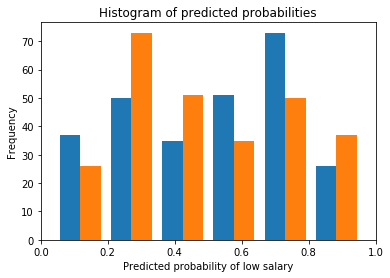

In [99]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=6)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of low salary')
plt.ylabel('Frequency')

In [101]:
print(confusion)

                predicted_low_salary  predicted_high_salary
is_low_salary                     94                     44
is_high_salary                    28                    106


In [102]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [103]:
evaluate_threshold(0.5)

Sensitivity: 0.6811594202898551
Specificity: 0.791044776119403


In [104]:
evaluate_threshold(0.3)

Sensitivity: 0.8840579710144928
Specificity: 0.5149253731343284


In [113]:
print(classification_report(y, predicted))

             precision    recall  f1-score   support

          0       0.80      0.85      0.82       455
          1       0.84      0.78      0.81       450

avg / total       0.82      0.82      0.82       905



In [116]:
# Get the predicted probability vector and explicitly name the columns:
Y_pp = pd.DataFrame(logreg.predict_proba(Xh_test), columns=['class_0_pp','class_1_pp'])
Y_pp.head(10)

,class_0_pp,class_1_pp
0,0.147591,0.852409
1,0.706305,0.293695
2,0.539637,0.460363
3,0.706305,0.293695
4,0.223294,0.776706
5,0.147591,0.852409
6,0.429796,0.570204
7,0.147591,0.852409
8,0.340897,0.659103
9,0.931420,0.068580


In [119]:
Y_pp['pred_class_thresh10'] = [1 if x >= 0.30 else 0 for x in Y_pp.class_1_pp.values]
Y_pp.head(20)

,class_0_pp,class_1_pp,pred_class_thresh10
0,0.147591,0.852409,1
1,0.706305,0.293695,0
2,0.539637,0.460363,1
3,0.706305,0.293695,0
4,0.223294,0.776706,1
5,0.147591,0.852409,1
6,0.429796,0.570204,1
7,0.147591,0.852409,1
8,0.340897,0.659103,1
9,0.931420,0.068580,0


In [120]:
conmat = np.array(confusion_matrix(y_test, Y_pp.pred_class_thresh10.values, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['is_low_salary', 'is_high_salary'],
                         columns=['predicted_low_salary','predicted_high_salary'])
confusion

,predicted_low_salary,predicted_high_salary
is_low_salary,122,16
is_high_salary,65,69


In [ ]:
# In 65 cases the model predicted low salary, when it was high salary, opposed to 16 cases 
#when the model predicted high salary, when it was low salary job and the models sensitivity is higher.
#Which means this model is more suitable for the requirements of "boss".

In [121]:
#Plot the ROC and precision-recall curves for at least one of your models.

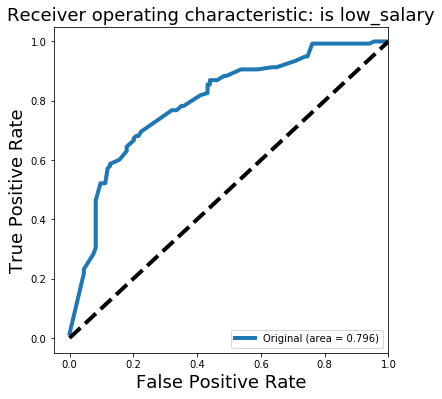

In [122]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(fpr, tpr, label='Original (area = %0.3f)' % roc_auc, linewidth=4)
ax.plot([0, 1], [0, 1], 'k--', linewidth=4)

ax.set_xlim([-0.05, 1.0])
ax.set_ylim([-0.05, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=18)
ax.set_ylabel('True Positive Rate', fontsize=18)
ax.set_title('Receiver operating characteristic: is low_salary', fontsize=18)
ax.legend(loc="lower right")

plt.show()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

#### Bonus:

- Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.
- Obtain the ROC/precision-recall curves for the different models you studied (at least the tuned model of each category) and compare.

In [ ]:
## YOUR CODE HERE

### Summarize your results in an executive summary written for a non-technical audience.
   
- Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

In [ ]:
## YOUR TEXT HERE IN MARKDOWN FORMAT 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### BONUS

Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

In [ ]:
## YOUR LINK HERE IN MARKDOWN FORMAT 